<a href="https://colab.research.google.com/github/id-shiv/project_notebooks/blob/master/%5BProject_100%5D_Neural_Networks_with_Python_and_Tensorflow_(Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks


## Introduction

* Input Layer : is the first layer.
> Consists of recommendation for a certain input.  
> Flatten : Convert multi-dimentional (array within an array) data into one-dimentional data.  
* Hidden Layer : include hidden layers for computation to improve the accuracy of the model.  
> Number of neurons in hiddden layer may be percentage of number of input features
* Output Layer : is the last layer.
> Outputs probability of recommendation being correct.

* Each connection from one neuron to another neuron is associated with weights.

## Model

(known as Weighted Sum)
```
Output = Sum ( Input Value X Weights) + Sum (Biases)
```
e.g.:
```
Model = v1 * w1 + v2 * w2 + v3 * w3 + v4 * w4 + b1 + b2 + b3 + b4
```

## Working

* Model starts off with random weights and biases and checks for correctness of output in training data.
* Model adjuts weights and biases to predict the training data against its output with multiple repeatations. 
* All of the output neurons will be fired to certain value which indicates the percentage \ probabibility of that output being accurate

### Activation Function

Context : Above model is similar to a linear function (mx + b) limits the degree of complexity.  
Allows you to create the above model with more complex non-linear higher degree function.

Output : 
```
f(Sum ( Input Value X Weights) + Sum (Biases))
```

e.g. : 
* Sigmoid function (Sets the output to be in between -1 and 1).
* Rectified linear unit (relu) - takes all the values that are negative and makes to 0 and all the values that are positive makes them higher positive.
* Softmax function

### Loss function

Loss functions are the ones responsible to adjust the weights and biases to predict outputs with better accuracy.  
Loss functions is way of calculating error while predicting outputs (in training).  

e.g.: Mean Squared Error.

* Loss functions are non-linears - hence handles high degree of complexity.

# Code



## Libraries

In [0]:
import tensorflow as tf

# Keras is an API from tensorflow to write less code
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas

## Data

### Import

Data to be imported is 70k+ labelled images of fashion accessories

In [0]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()

Map the labels (integers) to actual text

In [0]:
labels = ['T-shirt/ Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

### View Data (Images)

Plot the image

cmap binary - for black and white

Dress


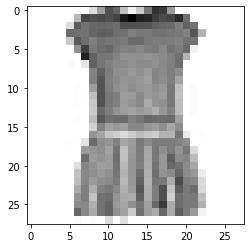

In [36]:
print(labels[train_labels[3]])

plt.imshow(train_images[3], cmap=plt.cm.binary)
plt.show()

### Prepare Data

Reduce the values (ranging from 0 to 255) to decimal

In [0]:
test_images = test_images / 255.0
train_images = train_images / 255.0

## Model

* Flatten Data :  
Current Data has 28 rows X 28 pixels in each row = 784 pixels
---
* Dense Layer :  
Fully connected layer - each neuron connected to each layer
---
* Output Layer :  
Current problem requires 10 neurons to represent 10 categories of prediction (i.e. image labels).  
Require 10 classes of labels for recommendation, set activation function as softmax

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax'),
])

### Compile

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Fit

Epochs : # of times the model views the data for processing, required since the accuracy of the model also depends on sequence in which the model view the data

In [40]:
model.fit(train_images, train_labels, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4957 - acc: 0.8255
Epoch 2/2
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3752 - acc: 0.8637


### Evaluate

In [48]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Test Loss : {test_loss}')
print(f'Test Accuracy : {test_accuracy * 100} percentage')

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3727 - acc: 0.8667
Test Loss : 0.3726923031926155
Test Accuracy : 86.66999936103821 percentage


## Predict




In [62]:
print(f'To be predicted : {labels[test_labels[3]]}')
predictions = model.predict(test_images)

recommendations = predictions[3]  # Get probabilities to all labels for image #3
predicted_image = np.argmax(recommendations)  # Get the label that has max probability
print(f'Predicted : {labels[predicted_image]}')  # Map the label to label name

To be predicted : Trouser
Predicted : Trouser


### View Output

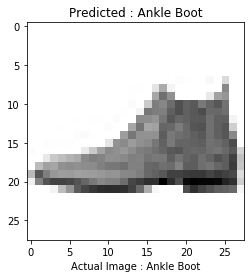

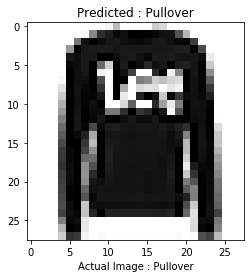

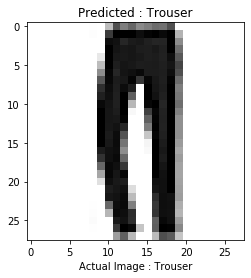

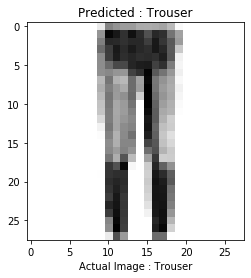

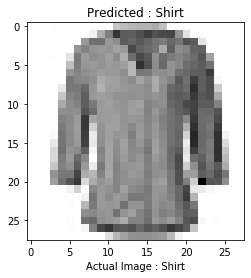

In [73]:
for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(f'Actual Image : {labels[test_labels[i]]}')

  # Get probabilities to all labels for image
  recommendations = predictions[i]  

  # Get the label that has max probability
  predicted_image = np.argmax(recommendations) 
   
  # Map the label to label name
  plt.title(f'Predicted : {labels[predicted_image]}')

  plt.show()